# Figure 2
<img src="files/img/fig2.png",width=400>
M1beta oscillations have a consistent sawtooth shape.A, Positive correlation between the relative sharpness beta oscillatory peaks and the relative steepness of beta voltage rises. Each
marker represents the average sharpness and steepness in a 30 s recording from a PDpatient either before DBS (blue) or during DBS (red).B, Schematic voltage traces corresponding to each quadrant
of A.M1 beta falls in the dark gray quadrants (quadrants I and III) of this two-dimensional space. C, Example voltage traces from 2 patients corresponding to the sawtooth waveforms in quadrants
I and III. These waveform shapes are consistent with the dark gray, but not the light gray, sawtooth shapes in B.

**Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
import util

**Load data**

In [3]:
ecog = util.loadPD()
Fs, t, S, Sdy, flo, fhi = util.loadmeta()

**Shape Calculations**

In [4]:
widthS = 5 # hyperparameter for calculating sharpness

pks, trs, pksharp, trsharp, esrs, \
peaktotrough, risteep, desteep, rdsrs, \
risetodecay = util.measure_shape(ecog, widthS=widthS)

# A
### Sharpness ratio and steepness ratio correlation

In [6]:
allpt = np.hstack((peaktotrough['B'],peaktotrough['D']))
allrd = np.hstack((risetodecay['B'],risetodecay['D']))
allpt = np.log10(allpt)
allrd = np.log10(allrd)
print(sp.stats.pearsonr(allpt, allrd))

(0.84333824469723562, 1.9075894845164422e-13)


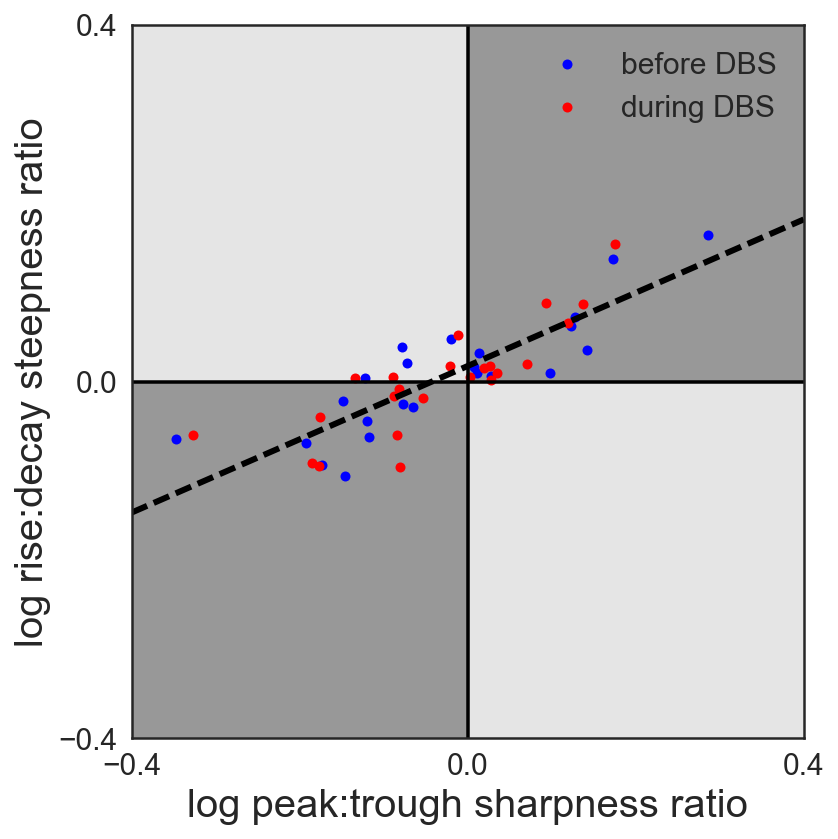

In [7]:
# Calculate linear fit
M = .4 # Range in log sharpness ratio
mb = np.polyfit(allpt, allrd,1)
xs = np.array([-M,M])
yfit = mb[1] + xs*mb[0]

plt.figure(figsize=(6,6))
plt.plot(np.log10(peaktotrough['B']), np.log10(risetodecay['B']),'b.',ms=10,label='before DBS')
plt.plot(np.log10(peaktotrough['D']), np.log10(risetodecay['D']),'r.',ms=10,label='during DBS')
plt.plot(xs, yfit, 'k--',linewidth=3)
plt.fill_between([0,M], [0,0], [M,M], facecolor='.2', alpha=.5, interpolate=True)
plt.fill_between([-M,0], [0,0], [-M,-M], facecolor='.2', alpha=.5, interpolate=True)
plt.fill_between([0,M], [0,0], [-M,-M], facecolor='.8', alpha=.5, interpolate=True)
plt.fill_between([-M,0], [0,0], [M,M], facecolor='.8', alpha=.5, interpolate=True)
plt.plot([-M,M],[0,0],'k-')
plt.plot([0,0],[-M,M],'k-')
plt.xlabel('log peak:trough sharpness ratio',size=20)
plt.ylabel('log rise:decay steepness ratio',size=20)
plt.xlim((-M,M))
plt.ylim((-M,M))
plt.xticks([-M,0,M],size=15)
plt.yticks([-M,0,M],size=15)
plt.legend(loc='best',fontsize=15)
plt.tight_layout()

# B
### Schematic of oscillation shape in each quadrant of sharpness ratio-steepness ratio space

(0, 68)

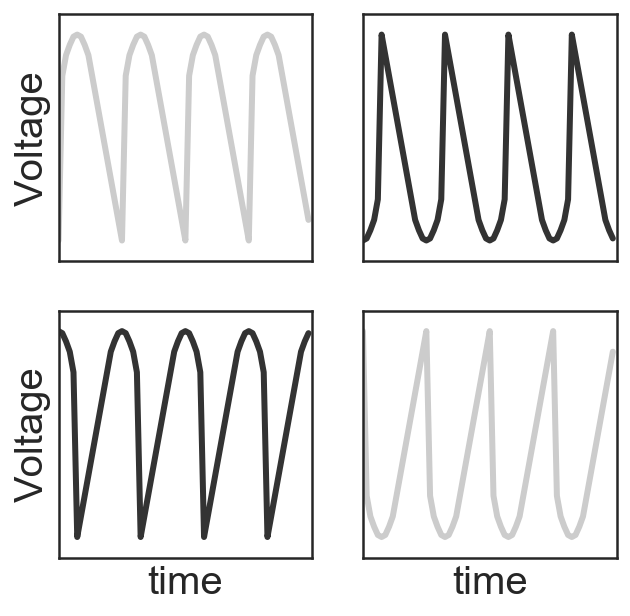

In [8]:
Ncycles = 4
cw = np.array([0,.01,.05,.1,.2,1,.9,.8,.7,.6,.5,.4,.3,.2,.1,.05,.01])
cw = np.tile(cw,(Ncycles))
tc = np.arange(len(cw))

iw = np.array([0,.8,.9,.95,.99,1,.99,.95,.9,.8,.7,.6,.5,.4,.3,.2,.1])
iw = -iw + 1
iw = np.tile(iw,(Ncycles))
ti = np.arange(len(cw))

plt.figure(figsize=(5,5))
plt.subplot(2,2,2)
plt.plot(tc,cw,'0.2',linewidth=3)
plt.xticks([],[],visible=False)
plt.ylim((-.1,1.1))
plt.yticks([],[],visible=False)
plt.xlim((0,len(tc)))

plt.subplot(2,2,4)
plt.plot(ti,iw,'0.8',linewidth=3)
plt.xticks([],[],visible=False)
plt.yticks([],[],visible=False)
plt.xlabel('time',size=20)
plt.ylim((-.1,1.1))
plt.xlim((0,len(tc)))

plt.subplot(2,2,3)
plt.plot(tc,-cw,'0.2',linewidth=3)
plt.ylabel('Voltage',size=20)
plt.xlabel('time',size=20)
plt.xticks([],[],visible=False)
plt.ylim((-1.1,.1))
plt.yticks([],[],visible=False)
plt.xlim((0,len(tc)))

plt.subplot(2,2,1)
plt.plot(ti,-iw,'0.8',linewidth=3)
plt.xticks([],[],visible=False)
plt.ylabel('Voltage',size=20)
plt.yticks([],[],visible=False)
plt.ylim((-1.1,.1))
plt.xlim((0,len(tc)))

# C
### 2 example raw traces showing sharpness ratio-steepness ratio relationship

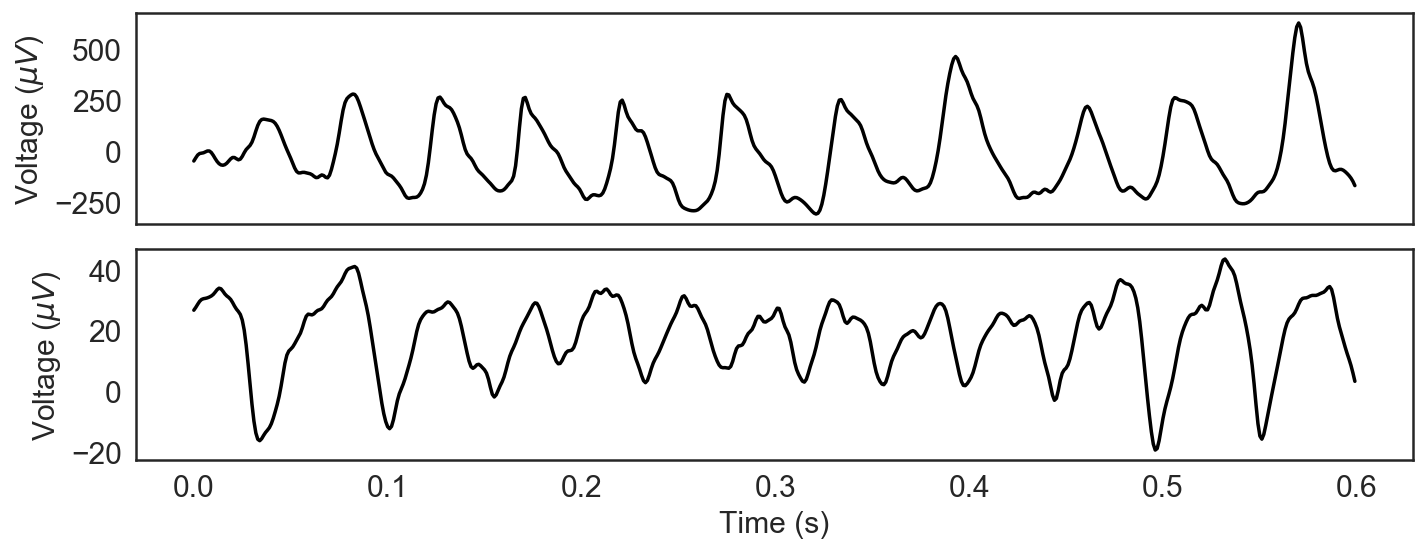

In [9]:
s1 = 0
s2 = 10
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
trange = [3000,3600]
dt = .001
plt.plot(np.arange(0,(trange[1]-trange[0])*dt,dt),ecog['B'][s1][trange[0]:trange[1]],'k')
plt.xticks([],[],visible=False)
plt.yticks(size=15)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.subplot(2,1,2)
trange = [15590,16190]
plt.plot(np.arange(0,(trange[1]-trange[0])*dt,dt),ecog['B'][s2][trange[0]:trange[1]],'k')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Time (s)',size=15)
plt.ylabel('Voltage ($\mu V$)',size=15)
plt.tight_layout()